## Demo vẽ bản đồ - đồ án môn cơ sở trí tuệ nhân tạo - ĐH KHTN TPHCM
Trợ giảng: 
- Nguyễn Khánh Toàn - ktoan271199@gmail.com
- Lê Minh Nhật - minhnhatvt2@gmail.com

## Chuẩn bị file input

In [61]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x   +xx  xxxx xxx xx\n')
    outfile.write('  x   x x xx   xxxx  x\n')
    outfile.write('x          xx +xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x Sx x  x\n')
    outfile.write('xxxxx x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

## Các hàm bổ trợ

In [62]:
import os
import math
import matplotlib.pyplot as plt

In [63]:
def visualize_maze(matrix, bonus, start, end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']

    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=100).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='silver')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
      print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')

In [64]:
def read_file(file_name: str = 'maze.txt'):
  f=open(file_name,'r')
  n_bonus_points = int(next(f)[:-1])
  bonus_points = []
  for i in range(n_bonus_points):
    x, y, reward = map(int, next(f)[:-1].split(' '))
    bonus_points.append((x, y, reward))

  text=f.read()
  matrix=[list(i) for i in text.splitlines()]
  f.close()

  return bonus_points, matrix

## Đọc file và vẽ bản đồ

In [65]:
bonus_points, matrix = read_file('maze_map.txt')

In [66]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 11
The width of the matrix: 22


In [67]:
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass

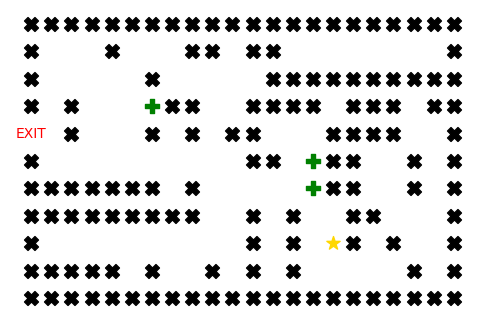

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [76]:
visualize_maze(matrix,bonus_points,start,end)

# Using basic matrix 

### try to DFS -- Status: Complete

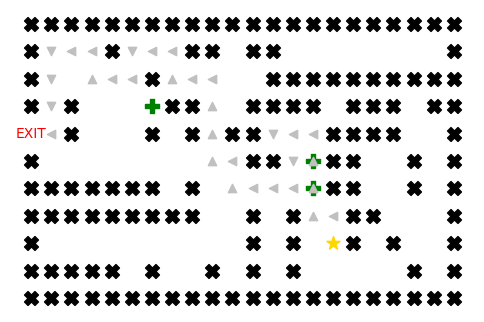

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [69]:
row = len(matrix)
col = len(matrix[0])

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
path = []
stack = []
stack.append((x,y))

while end not in stack:
    s = stack[-1]
    if s not in path:
        path.append(s)
    for i in range(4) :
        # using the direction array
        a = s[0] + Dir[i][0]
        b = s[1] + Dir[i][1]
             
        # not blocked and valid
        if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
            stack.append((a, b))
            break
        if(i == 3 and (a, b) in stack):
            stack.pop()
path.append(end)
visualize_maze(matrix,bonus_points,start,end, path)

### Try to BFS -- Status: Complete

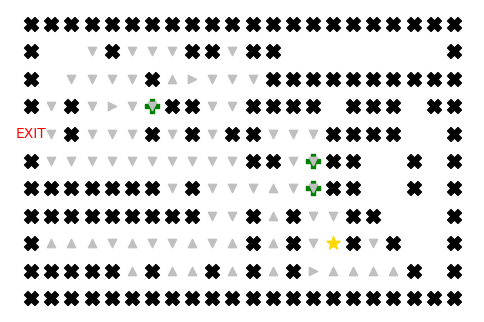

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [70]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
     
# Do a BFS starting from source cell
while q:
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
         
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            visited[a][b] = True
            q.append((a, b))
visualize_maze(matrix,bonus_points,start,end, path)

### Try to Greedy Best First Search - Status: Complete(using shorted distance)

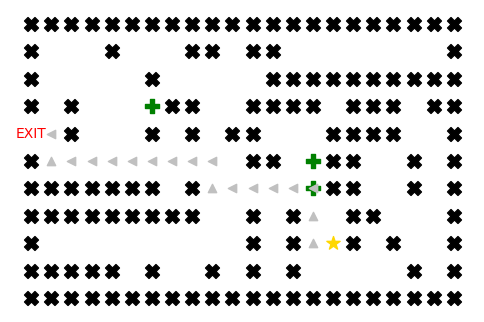

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [71]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
     
# Do a BFS starting from source cell
while q:
    distance = []
    store_point = []
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            visited[a][b] = True
            #calculate distance from point current to end
            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
            distance.append(dist)
            store_point.append((a, b))
            #select point based on distance array
        if i == 3:
            q.append(store_point[distance.index(min(distance))])
                
                
path
visualize_maze(matrix,bonus_points,start,end, path)

### Try to A* - Status: Complete

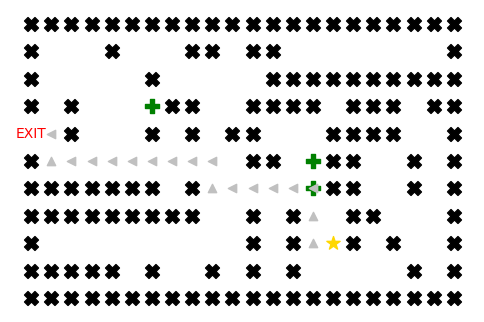

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [75]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell

#store real time distance from start point to end
real_dist = 0
# Do a BFS starting from source cell
while q:
    distance = []
    store_point = []
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            visited[a][b] = True
            #calculate distance from point current to end
            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
            distance.append(dist)
            store_point.append((a, b))
            #select point based on distance array
        if i == 3:
            real_dist += min(distance)
            q.append(store_point[distance.index(min(distance))])
                
visualize_maze(matrix,bonus_points,start,end, path)

# Using bonus point matrix

In [77]:
with open('maze_map(bonus).txt', 'w') as outfile:
    outfile.write('3\n')
    outfile.write('3 6 -3\n')
    outfile.write('5 14 -1\n')
    outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x   +xx  xxxx xxx xx\n')
    outfile.write('  x   x x xx   xxxx  x\n')
    outfile.write('x          xx +xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x Sx x  x\n')
    outfile.write('xxxxx x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

In [79]:
bonus_points, matrix = read_file('maze_map(bonus).txt')

In [80]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 11
The width of the matrix: 22


In [81]:
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass

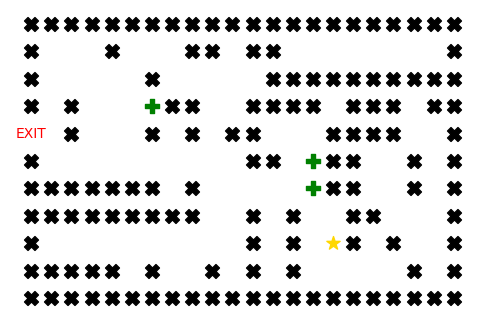

Starting point (x, y) = (8, 15)
Ending point (x, y) = (4, 0)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [85]:
visualize_maze(matrix, bonus_points, start, end)

In [97]:
def init_weights(matrix):
    weights = [[1 for i in range(col)]for j in range(row)]
    for k in bonus_points:
        weights[k[0]][k[1]] = k[2]
    return weights

-3

### Try to DFS - Status:

In [ ]:
#define row and col
row = len(matrix)
col = len(matrix[0])

#define start point
x = start[0]
y = start[1]

#define direction, path, stack
Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
path = []
stack = []
stack.append((x,y))

#define weights in matrix
weights = init_weights(matrix)
while end not in stack:
    #store weight when we move current point
    store_dist = []
    
    s = stack[-1]
    if s not in path:
        path.append(s)
    for i in range(4) :
        # using the direction array
        a = s[0] + Dir[i][0]
        b = s[1] + Dir[i][1]
             
        # not blocked and valid
        if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
            stack.append((a, b))
            break
        if(i == 3 and (a, b) in stack):
            stack.pop()
path.append(end)
visualize_maze(matrix,bonus_points,start,end, path)

In [84]:
bonus_points

[(3, 6, -3), (5, 14, -1), (6, 14, -1)]